In [1]:
# EDA Step:

In [2]:
# Configuration 
import configparser

# Create ConfigParser object
config = configparser.ConfigParser()
config.read("Config.ini")

df_3_both_pkl = config.get("3_BOTH", "df_3_both_pkl")

drop_columns = config.get("4_EDA", "drop_columns").replace("\n", "").split(", ")

df_4_eda_pkl = config.get("4_EDA", "df_4_eda_pkl")
df_4_eda_csv = config.get("4_EDA", "df_4_eda_csv")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# unpickle - pandas dataframe:

df = pd.read_pickle(df_3_both_pkl)

print(df.shape)

(520, 35)


In [5]:
df.head(5)

,delomrade,lan,latitud,longitud,groda,sort,jordart,skordear,graderingsdatum,graderingstyp,...,CLDM_7d_avg,Q0_7d_avg,RR_7d_sum,BT_7d_sum,G0_7d_sum,G3_7d_sum,G5_7d_sum,G7_7d_sum,G8_7d_sum,G10_7d_sum
0,SV Skåne,Skåne län,6135000,397000,Höstvete,Elixer,None,2017,2017-04-17,Veckovis,...,60.75,12.08,0.1,0.0,56.0,4.0,0.0,0.0,0.0,0.0
1,SV Skåne,Skåne län,6135000,397000,Höstvete,Mariboss,None,2017,2017-04-17,Veckovis,...,60.75,12.08,0.1,0.0,56.0,4.0,0.0,0.0,0.0,0.0
2,SV Skåne,Skåne län,6135000,397000,Höstvete,Praktik,None,2017,2017-04-17,Veckovis,...,60.75,12.08,0.1,0.0,56.0,4.0,0.0,0.0,0.0,0.0
3,SV Skåne,Skåne län,6135000,397000,Höstvete,Torp,None,2017,2017-04-17,Veckovis,...,60.75,12.08,0.1,0.0,56.0,4.0,0.0,0.0,0.0,0.0
4,SV Skåne,Skåne län,6135000,397000,Höstvete,Elixer,None,2017,2017-04-24,Veckovis,...,70.25,12.75,2.1,0.0,60.0,4.0,0.0,0.0,0.0,0.0


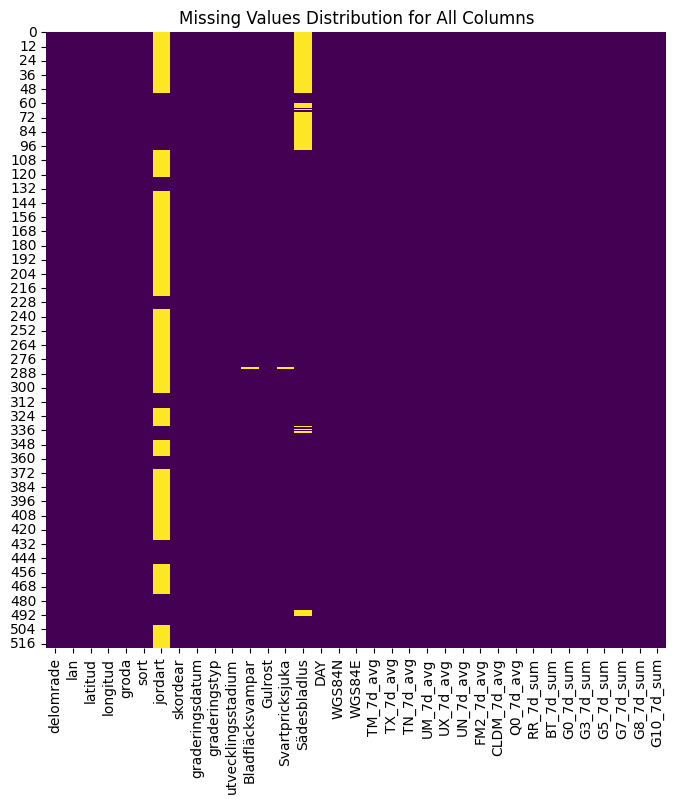

In [6]:
# Missing Values Distribution for All Columns:

plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Distribution for All Columns")
plt.show()

In [7]:
# Data Cleaning Step:

print(df.shape)

df.drop(drop_columns, axis=1, inplace=True)

df = df.dropna(subset=['Bladfläcksvampar'])

print(drop_columns)
print(df.shape)

(520, 35)
['DAY', 'Gulrost', 'Svartpricksjuka']
(518, 32)


In [8]:
# Handling missing values:

print(df['jordart'].isnull().sum())
print(df['jordart'].value_counts())
df['jordart'] = df['jordart'].fillna('Unknown')
print(df['jordart'].value_counts())

366
jordart
Lättlera (15-25 % ler)        118
Leriga jordar (5-15 % ler)     34
Name: count, dtype: int64
jordart
Unknown                       366
Lättlera (15-25 % ler)        118
Leriga jordar (5-15 % ler)     34
Name: count, dtype: int64


In [9]:
# Handle Outliers Using IQR:

def remove_outliers(df, columns, threshold=7):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Select numeric columns for outlier removal
#numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
#outlier_cols = ['Sädesbladlus']
#df = remove_outliers(df, outlier_cols)

# Impute or drop missing values (if needed)
#df = df.dropna()  # or use df.fillna() for imputation

print(df.shape)

(518, 32)


In [10]:
# Feature Engineering:

# Convert graderingsdatum to datetime format
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])

# Extract features from graderingsdatum
df['g_year'] = df['graderingsdatum'].dt.year
df['g_month'] = df['graderingsdatum'].dt.month
df['g_week'] = df['graderingsdatum'].dt.isocalendar().week
#df['day_of_week'] = df['graderingsdatum'].dt.weekday
#df['day_of_year'] = df['graderingsdatum'].dt.dayofyear

In [11]:
df.head(5)

,delomrade,lan,latitud,longitud,groda,sort,jordart,skordear,graderingsdatum,graderingstyp,...,BT_7d_sum,G0_7d_sum,G3_7d_sum,G5_7d_sum,G7_7d_sum,G8_7d_sum,G10_7d_sum,g_year,g_month,g_week
0,SV Skåne,Skåne län,6135000,397000,Höstvete,Elixer,Unknown,2017,2017-04-17,Veckovis,...,0.0,56.0,4.0,0.0,0.0,0.0,0.0,2017,4,16
1,SV Skåne,Skåne län,6135000,397000,Höstvete,Mariboss,Unknown,2017,2017-04-17,Veckovis,...,0.0,56.0,4.0,0.0,0.0,0.0,0.0,2017,4,16
2,SV Skåne,Skåne län,6135000,397000,Höstvete,Praktik,Unknown,2017,2017-04-17,Veckovis,...,0.0,56.0,4.0,0.0,0.0,0.0,0.0,2017,4,16
3,SV Skåne,Skåne län,6135000,397000,Höstvete,Torp,Unknown,2017,2017-04-17,Veckovis,...,0.0,56.0,4.0,0.0,0.0,0.0,0.0,2017,4,16
4,SV Skåne,Skåne län,6135000,397000,Höstvete,Elixer,Unknown,2017,2017-04-24,Veckovis,...,0.0,60.0,4.0,0.0,0.0,0.0,0.0,2017,4,17


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 519
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   delomrade           518 non-null    object        
 1   lan                 518 non-null    object        
 2   latitud             518 non-null    object        
 3   longitud            518 non-null    object        
 4   groda               518 non-null    object        
 5   sort                518 non-null    object        
 6   jordart             518 non-null    object        
 7   skordear            518 non-null    int64         
 8   graderingsdatum     518 non-null    datetime64[ns]
 9   graderingstyp       518 non-null    object        
 10  utvecklingsstadium  518 non-null    int64         
 11  Bladfläcksvampar    518 non-null    float64       
 12  Sädesbladlus        420 non-null    float64       
 13  WGS84N              518 non-null    float64       
 14 

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
skordear,518.0,2019.428571,2016.0,2017.0,2019.0,2022.0,2024.0,2.38907
graderingsdatum,518,2019-10-30 07:30:20.849420800,2016-04-18 00:00:00,2017-07-03 00:00:00,2019-05-27 00:00:00,2022-04-18 18:00:00,2024-05-17 00:00:00,NaN
utvecklingsstadium,518.0,48.208494,22.0,31.0,39.0,69.0,87.0,20.205017
Bladfläcksvampar,518.0,19.289575,0.0,0.0,14.0,26.0,100.0,23.189012
Sädesbladlus,420.0,0.47569,0.0,0.0,0.0,0.0,59.0,3.794301
WGS84N,518.0,69.042,69.042,69.042,69.042,69.042,69.042,0.0
WGS84E,518.0,20.262,20.262,20.262,20.262,20.262,20.262,0.0
TM_7d_avg,518.0,3.532954,-8.35,0.13,3.77,6.75,16.4,4.826976
TX_7d_avg,518.0,7.956216,-4.23,3.98,7.765,11.32,22.83,5.20374
TN_7d_avg,518.0,-0.945598,-13.55,-3.7325,-0.25,2.6,10.38,4.840243


In [14]:
df.describe(include=['object']).T

,count,unique,top,freq
delomrade,518,2,SV Skåne,422
lan,518,1,Skåne län,518
latitud,518,5,6136000,203
longitud,518,9,396000,104
groda,518,1,Höstvete,518
sort,518,14,Torp,97
jordart,518,3,Unknown,366
graderingstyp,518,1,Veckovis,518


In [15]:
# Check the distribution of categorical variables:
print(df.select_dtypes(include=['object']).nunique())

delomrade         2
lan               1
latitud           5
longitud          9
groda             1
sort             14
jordart           3
graderingstyp     1
dtype: int64


In [16]:
# Missing Values:
df.isnull().sum()

delomrade              0
lan                    0
latitud                0
longitud               0
groda                  0
sort                   0
jordart                0
skordear               0
graderingsdatum        0
graderingstyp          0
utvecklingsstadium     0
Bladfläcksvampar       0
Sädesbladlus          98
WGS84N                 0
WGS84E                 0
TM_7d_avg              0
TX_7d_avg              0
TN_7d_avg              0
UM_7d_avg              0
UX_7d_avg              0
UN_7d_avg              0
FM2_7d_avg             0
CLDM_7d_avg            0
Q0_7d_avg              0
RR_7d_sum              0
BT_7d_sum              0
G0_7d_sum              0
G3_7d_sum              0
G5_7d_sum              0
G7_7d_sum              0
G8_7d_sum              0
G10_7d_sum             0
g_year                 0
g_month                0
g_week                 0
dtype: int64

# All Features:

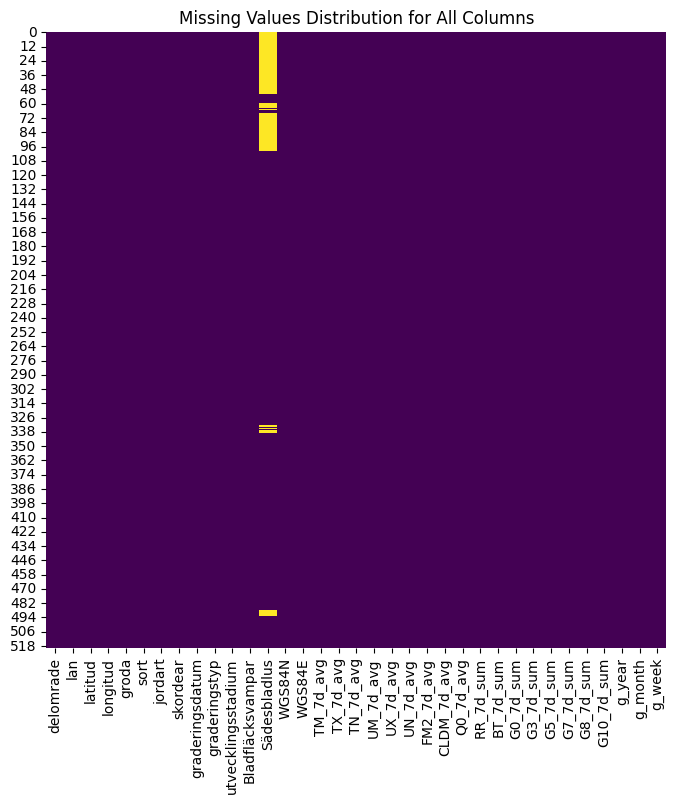

In [17]:
# Missing Values Distribution for All Columns:

plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Distribution for All Columns")
plt.show()

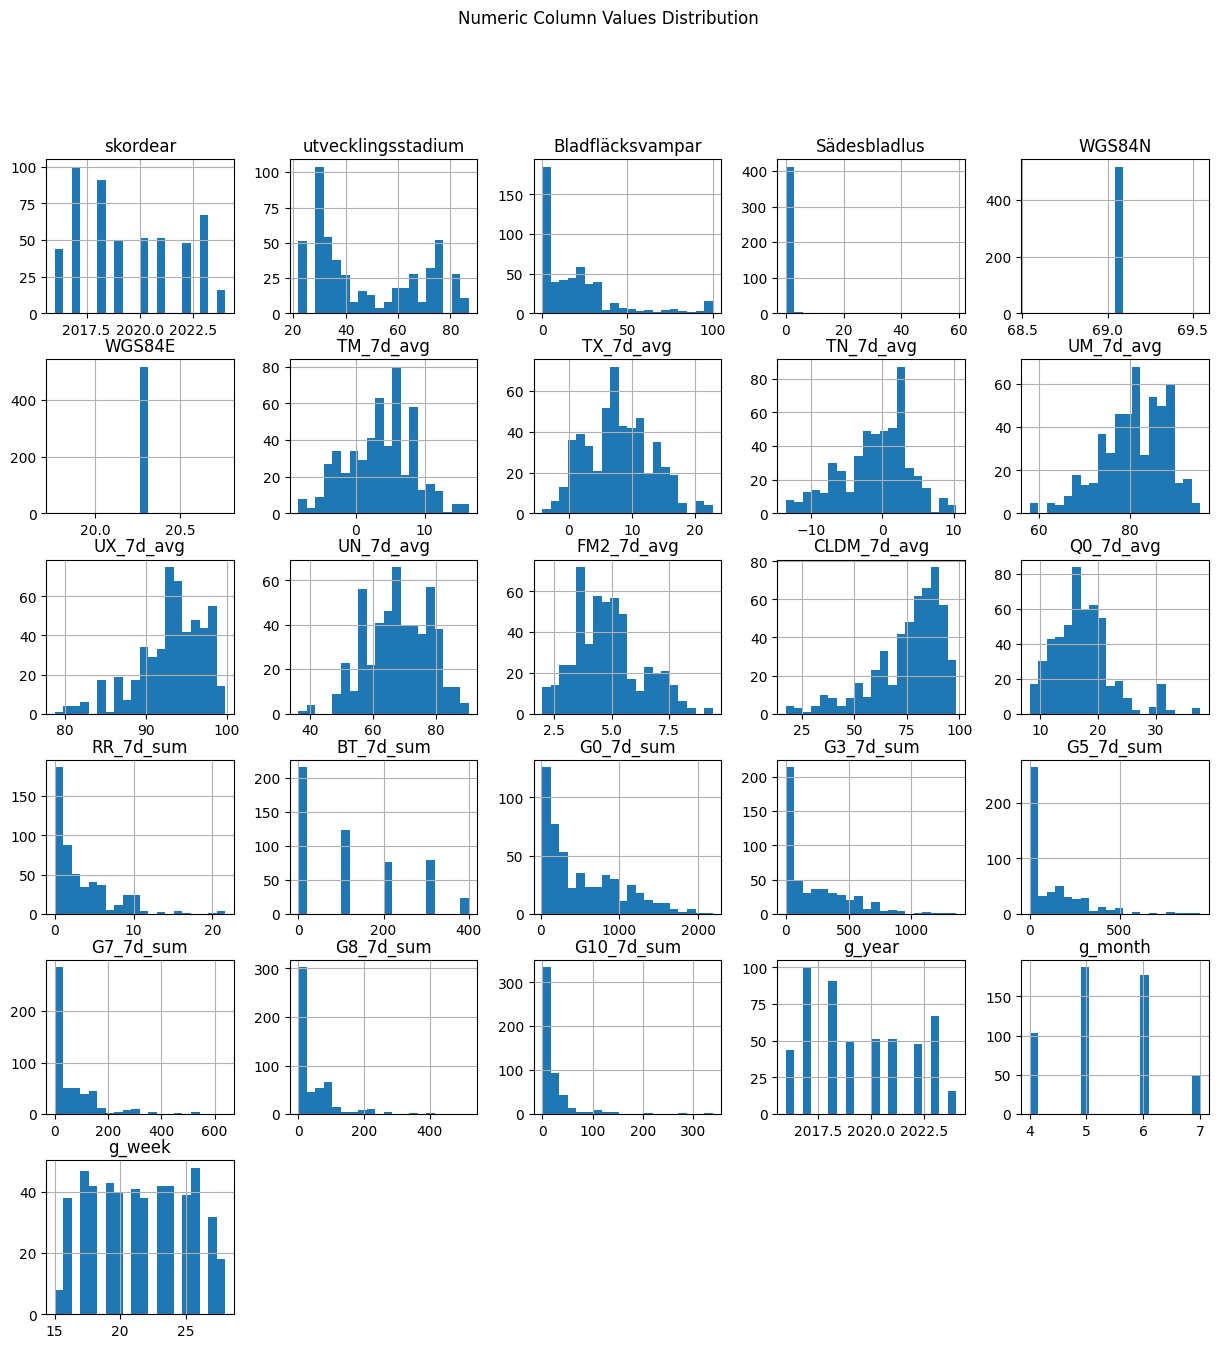

In [18]:
# Numeric Column Values Distribution:

df.select_dtypes(include=['number']).hist(bins=20, figsize=(15, 15))
plt.suptitle("Numeric Column Values Distribution")
plt.show()

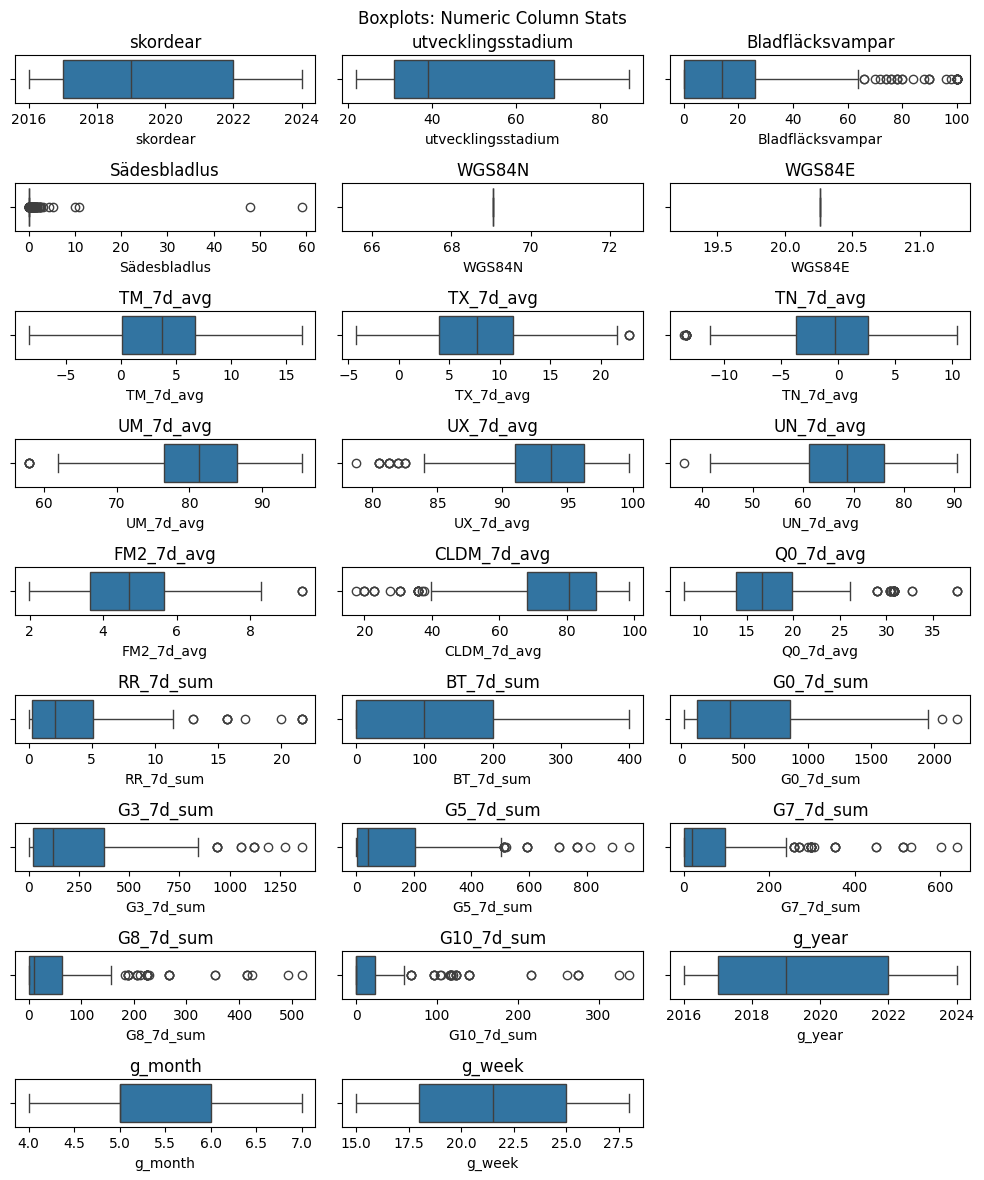

In [19]:
# Boxplots - Numeric Column Stats to Check Outliers:

plt.figure(figsize=(10, 12))
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calculate the number of rows and columns required for the subplots
n_cols = 3  # Set number of columns (you can change this)
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols != 0 else 0)

# Create the subplots dynamically based on the number of numeric columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    #plt.title(f"Boxplot of {col}")
    plt.title(col)

plt.suptitle("Boxplots: Numeric Column Stats")
plt.tight_layout()
plt.show()

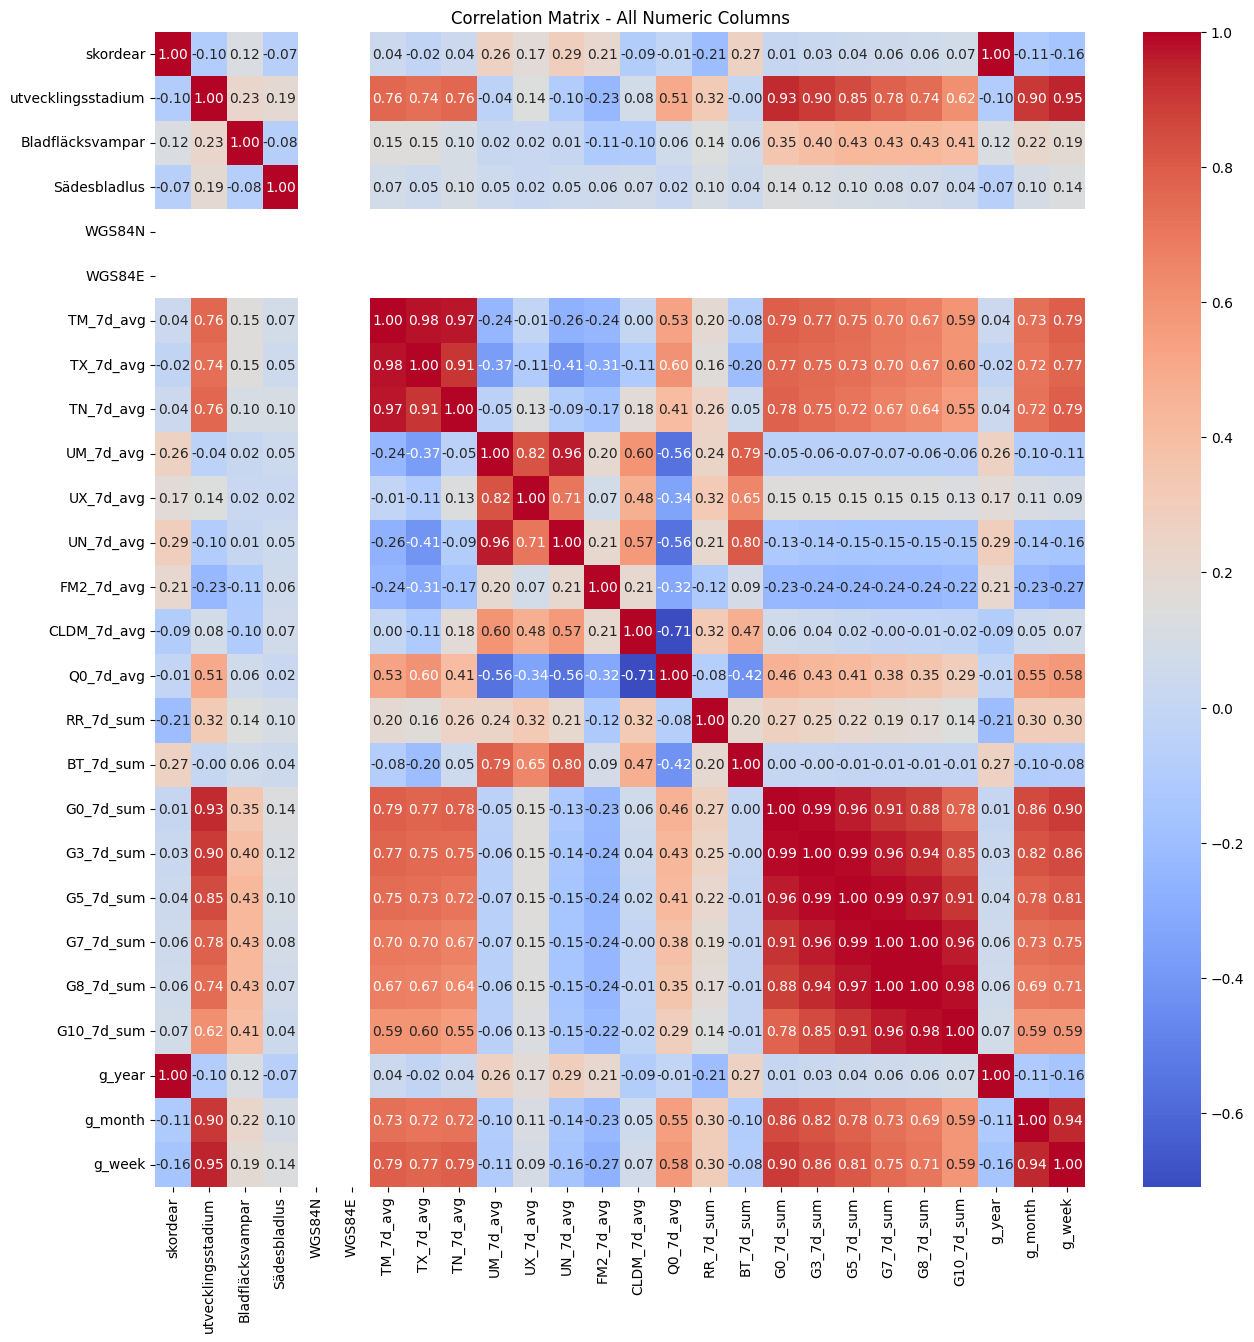

In [20]:
# Correlation Heatmap - All Numerical Features:

plt.figure(figsize=(15, 15))   #(12, 8)
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - All Numeric Columns")
plt.show()

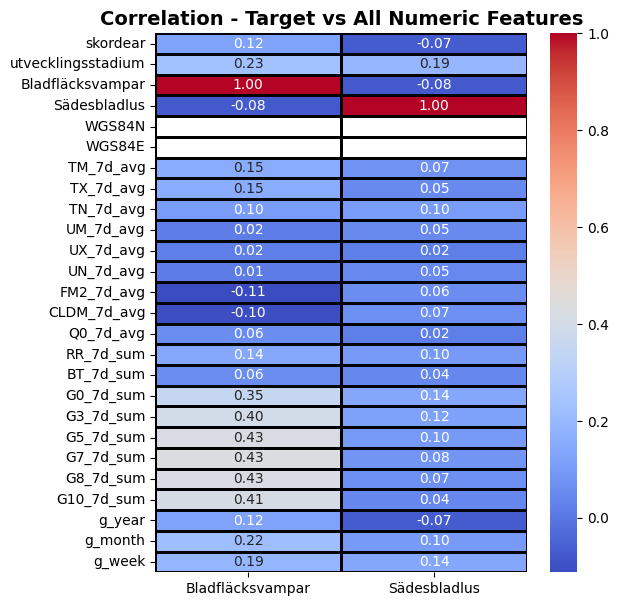

In [21]:
# Correlation Heatmap - Target vs Numerical Features:

# Select target columns and find correlation with other numeric columns
target_cols = ['Bladfläcksvampar', 'Sädesbladlus']
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()[target_cols]

# Heatmap of correlations
plt.figure(figsize=(6, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')
plt.title("Correlation - Target vs All Numeric Features", fontsize=14, fontweight='bold')
plt.show()

# Bladfläcksvampar:

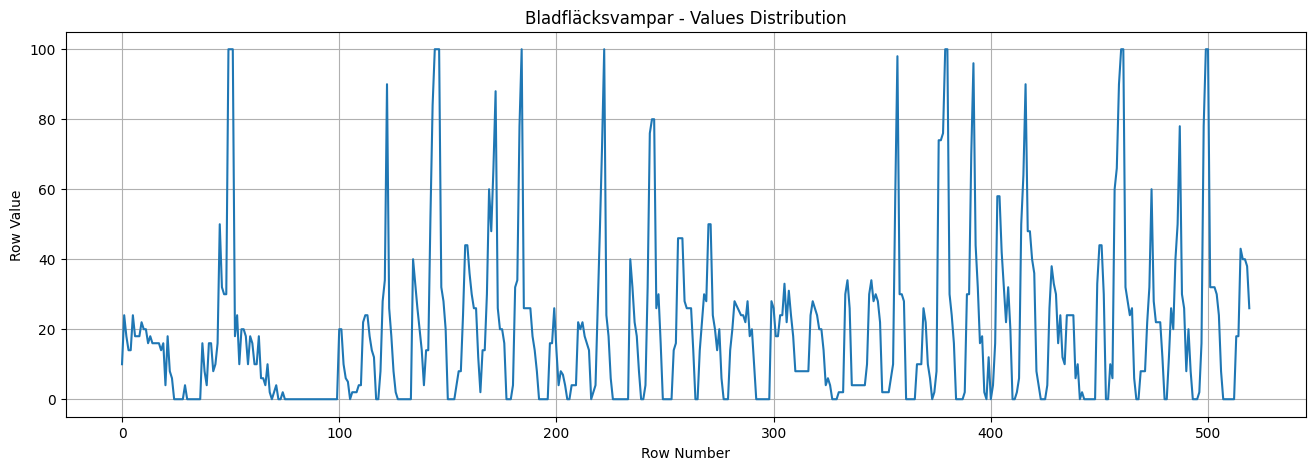

In [22]:
# Line Plot - Target Variable Values Distribution:

plt.figure(figsize=(16,5))
df['Bladfläcksvampar'].plot()
plt.xlabel('Row Number')
plt.ylabel('Row Value')
plt.title('Bladfläcksvampar - Values Distribution')
plt.grid(True)

plt.show()

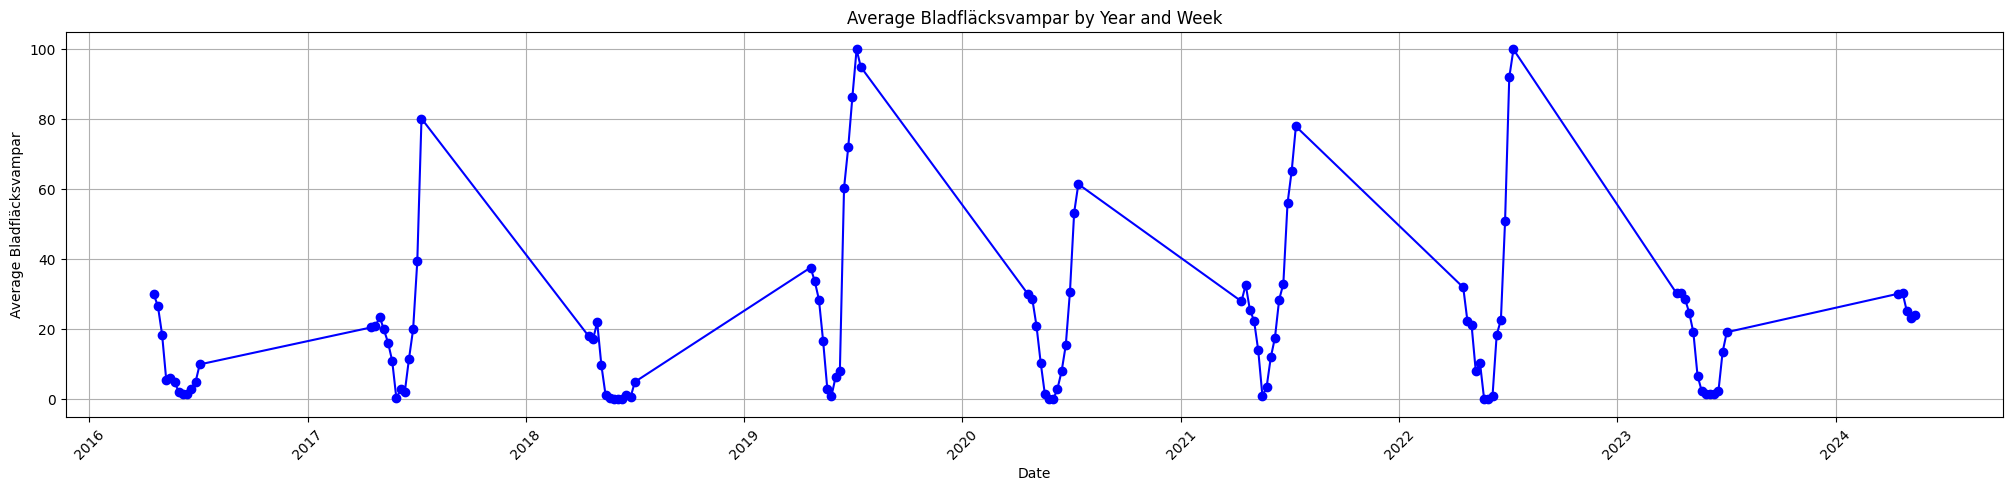

In [23]:
# Line Plot - Average by Year & Week:

group_by_year_week = df.groupby(['g_year', 'g_week'])['Bladfläcksvampar'].mean().reset_index()

# Convert year-week to a datetime format (assuming 'g_week' follows ISO week numbering)
group_by_year_week['date'] = pd.to_datetime(group_by_year_week['g_year'].astype(str) + '-' + 
                                            group_by_year_week['g_week'].astype(str) + '-1', 
                                            format='%Y-%W-%w')

# Plot time series
plt.figure(figsize=(25,5))
plt.plot(group_by_year_week['date'], group_by_year_week['Bladfläcksvampar'], marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Average Bladfläcksvampar')
plt.grid(True)
plt.title('Average Bladfläcksvampar by Year and Week')
plt.xticks(rotation=45)

plt.show()

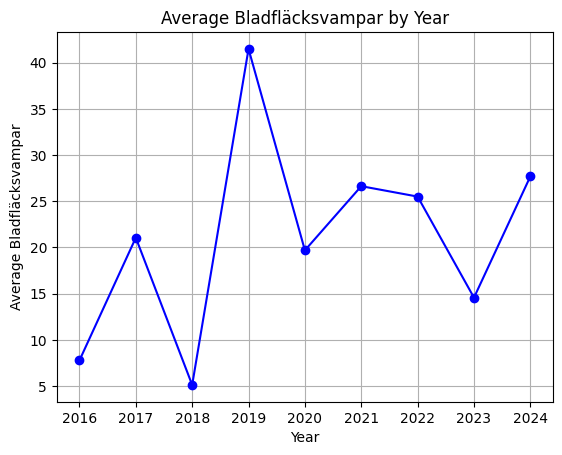

In [24]:
# Line Plot - Average by Year:

group_by_year = df.groupby(['g_year'])
average_by_year = group_by_year['Bladfläcksvampar'].mean()

plt.plot(average_by_year.index, average_by_year, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Bladfläcksvampar')
plt.xticks(average_by_year.index)  # Set x-ticks to match the years in the data
plt.grid(True)
plt.title('Average Bladfläcksvampar by Year')

plt.show()

Text(0.5, 1.0, 'Average Bladfläcksvampar by Month')

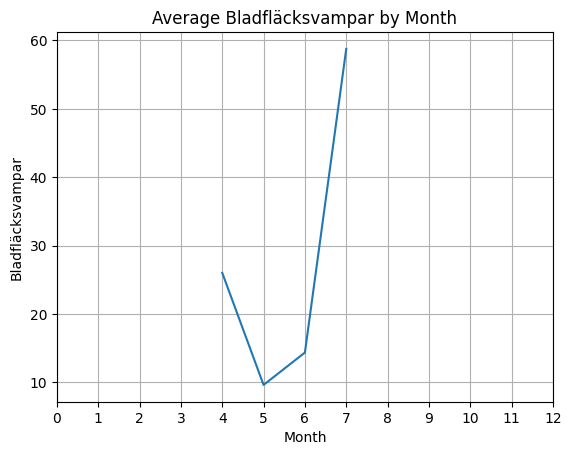

In [25]:
# Line Plot - Average by Month:

group_month = df.groupby(['g_month'])
average_by_month = group_month['Bladfläcksvampar'].mean()

plt.plot(average_by_month.index,average_by_month)
plt.xlabel('Month')
plt.ylabel('Bladfläcksvampar')
plt.xticks(np.arange(13))
plt.grid(True)
plt.title('Average Bladfläcksvampar by Month')

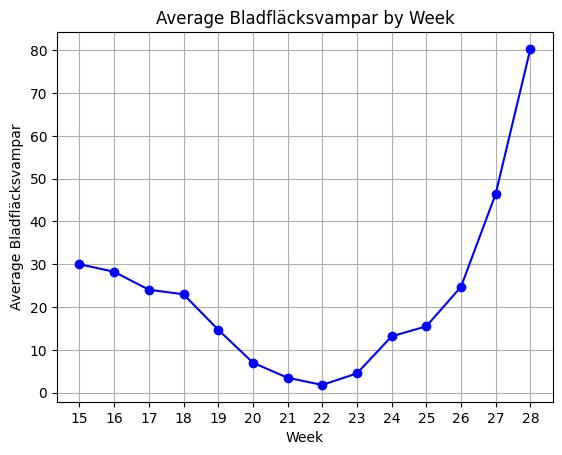

In [26]:
# Line Plot - Average by Week:

group_by_week = df.groupby(['g_week'])
average_by_week = group_by_week['Bladfläcksvampar'].mean()

plt.plot(average_by_week.index, average_by_week, marker='o', color='b')
plt.xlabel('Week')
plt.ylabel('Average Bladfläcksvampar')
plt.xticks(average_by_week.index)  # Set x-ticks to match the weeks in the data
plt.grid(True)
plt.title('Average Bladfläcksvampar by Week')

plt.show()

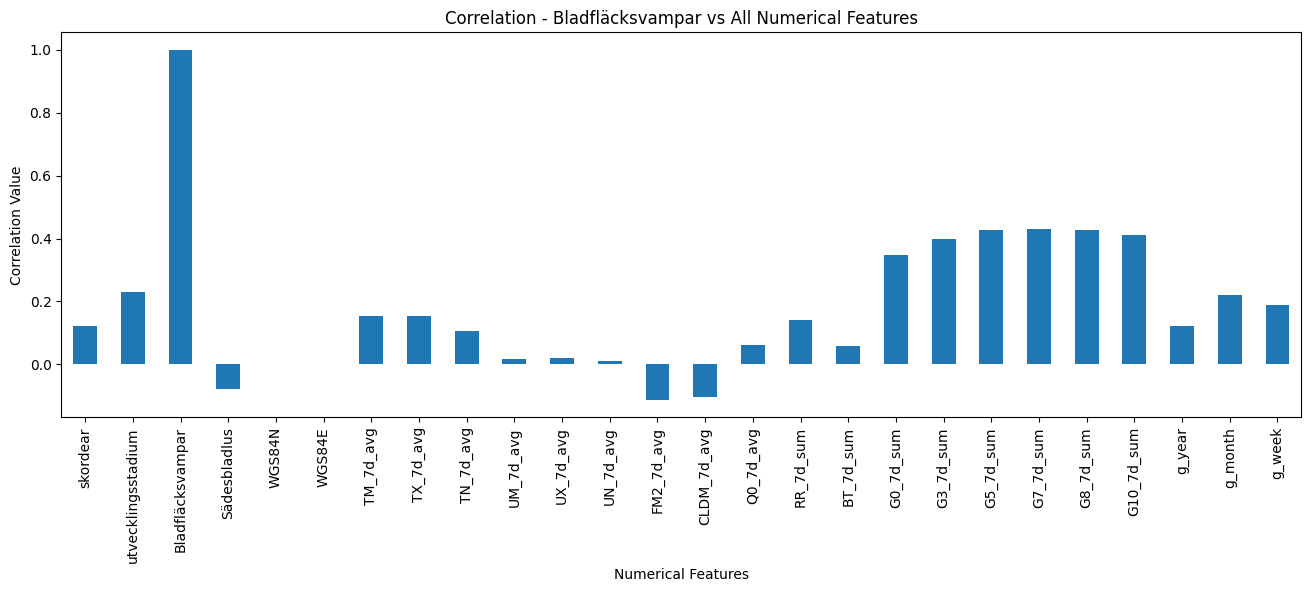

In [27]:
# Correlation Plot - Target vs Numerical Features:

plt.figure(figsize=(16,5))
corr_matrix['Bladfläcksvampar'].plot(kind='bar')
plt.title("Correlation - Bladfläcksvampar vs All Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel("Correlation Value")
plt.show()

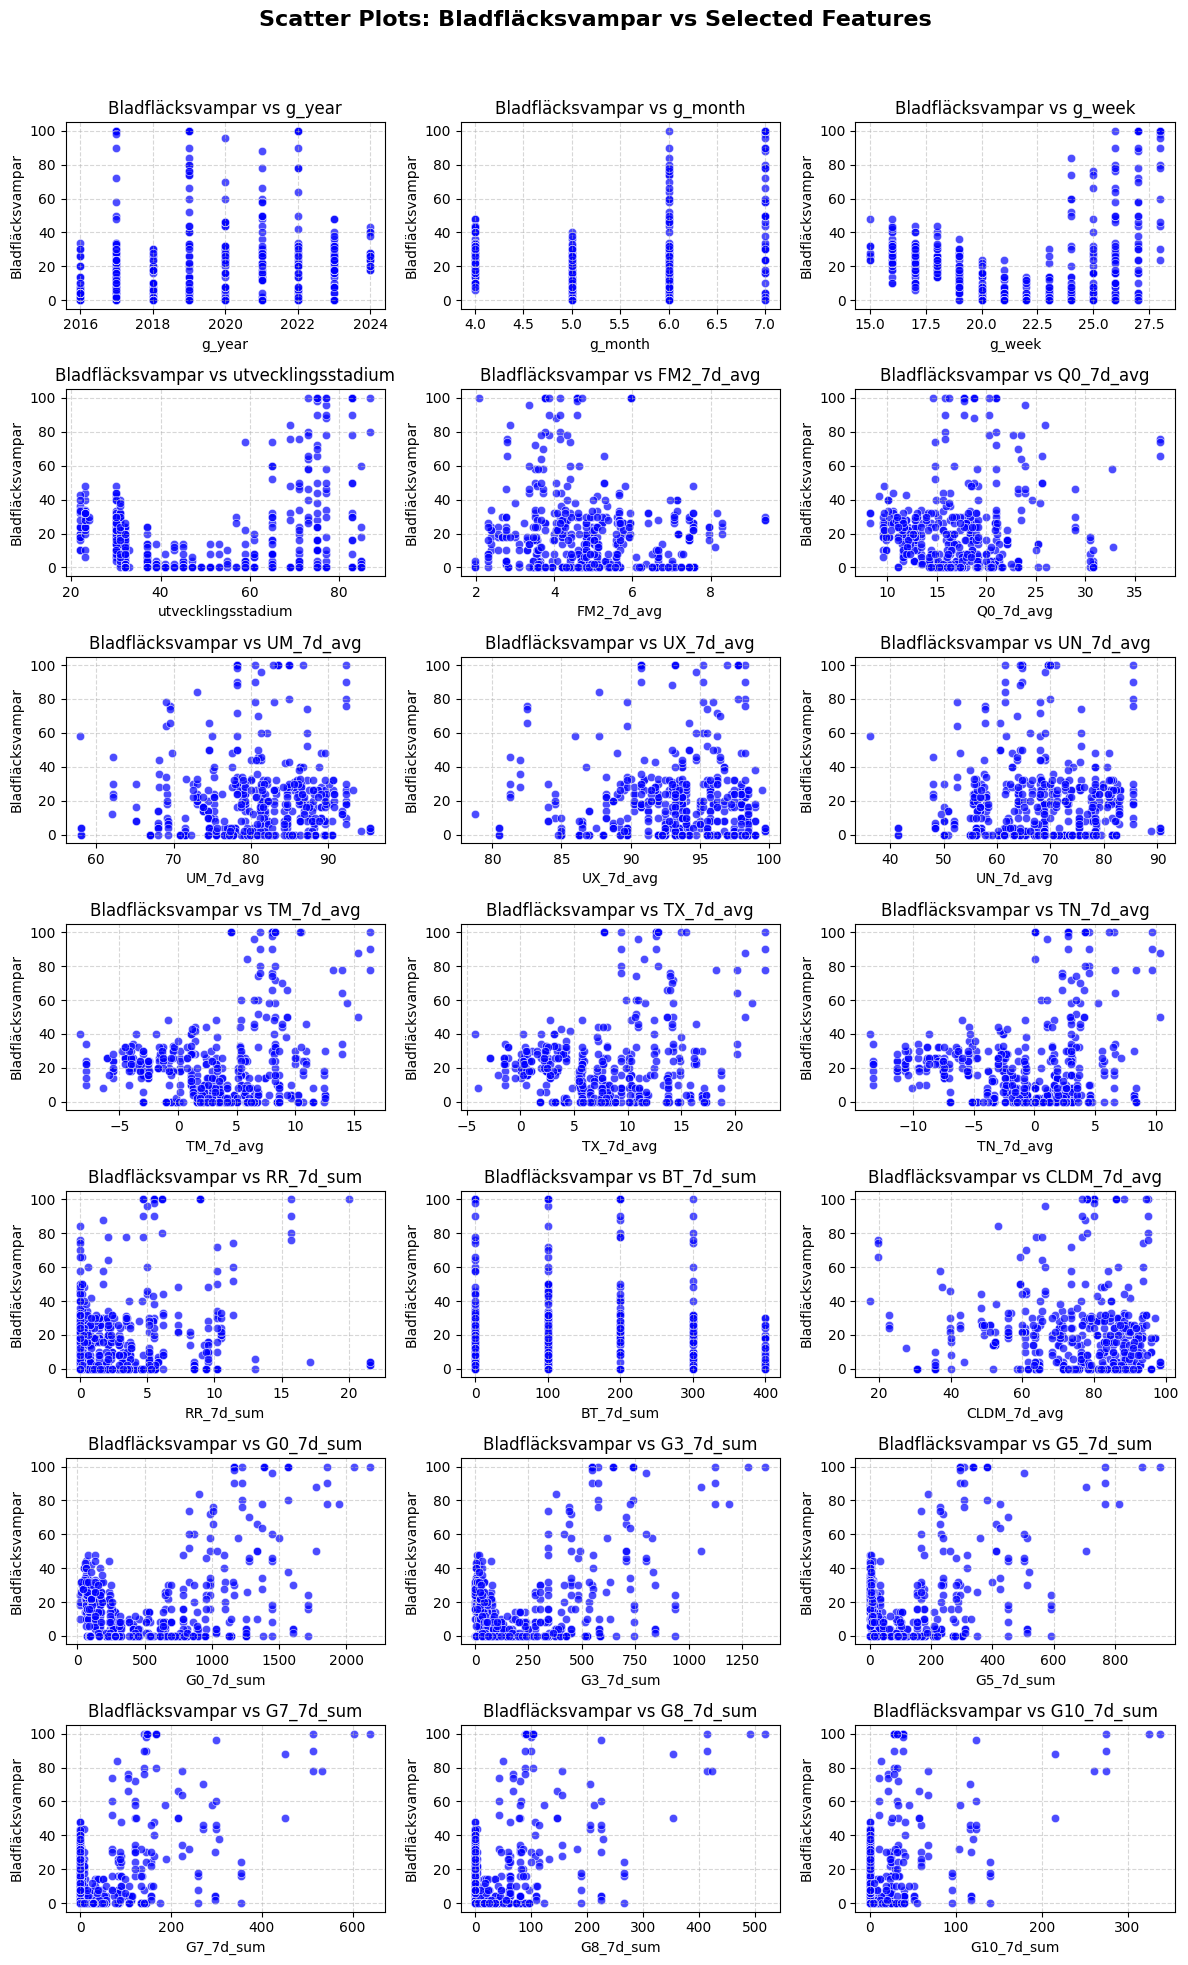

In [28]:
# Scatter Plot - Target vs Selected Features:

# Define the target column and the selected columns for comparison
target_col = 'Bladfläcksvampar'
comparison_cols = ['g_year', 'g_month', 'g_week', 
                   'utvecklingsstadium', 'FM2_7d_avg', 'Q0_7d_avg', 
                   'UM_7d_avg', 'UX_7d_avg', 'UN_7d_avg', 
                   'TM_7d_avg', 'TX_7d_avg', 'TN_7d_avg', 
                   'RR_7d_sum', 'BT_7d_sum', 'CLDM_7d_avg', 
                   'G0_7d_sum', 'G3_7d_sum', 'G5_7d_sum',
                   'G7_7d_sum', 'G8_7d_sum', 'G10_7d_sum']

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(7, 3, figsize=(12, 20))  # Adjust layout for better visibility
fig.suptitle(f"Scatter Plots: {target_col} vs Selected Features", fontsize=16, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through selected columns and create scatter plots
for i, col in enumerate(comparison_cols):
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i], color="blue", alpha=0.7)
    axes[i].set_title(f"{target_col} vs {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Sädesbladlus:

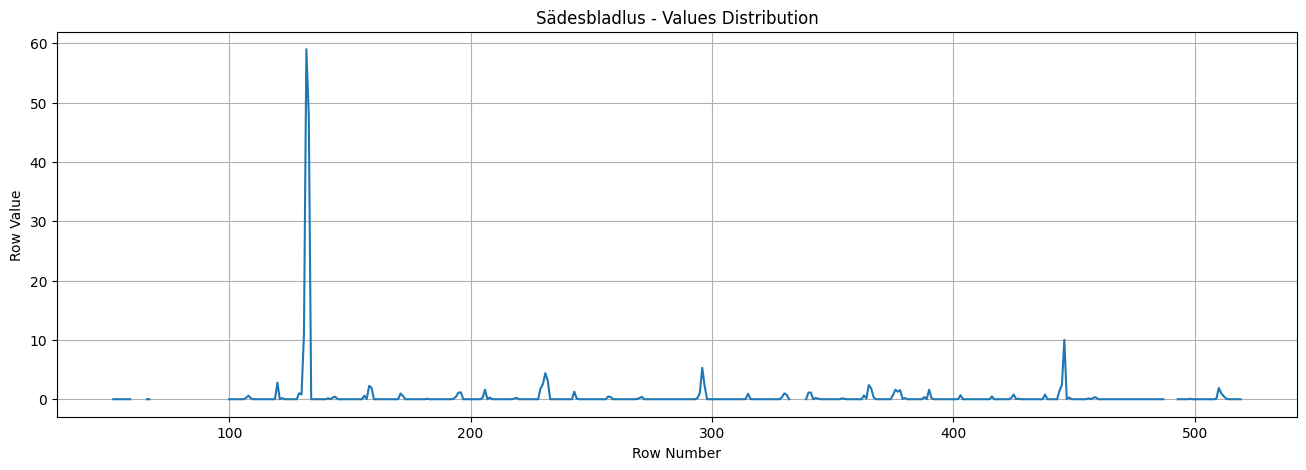

In [29]:
# Line Plot - Target Variable Values Distribution:

plt.figure(figsize=(16,5))
df['Sädesbladlus'].plot()
plt.xlabel('Row Number')
plt.ylabel('Row Value')
plt.title('Sädesbladlus - Values Distribution')
plt.grid(True)

plt.show()

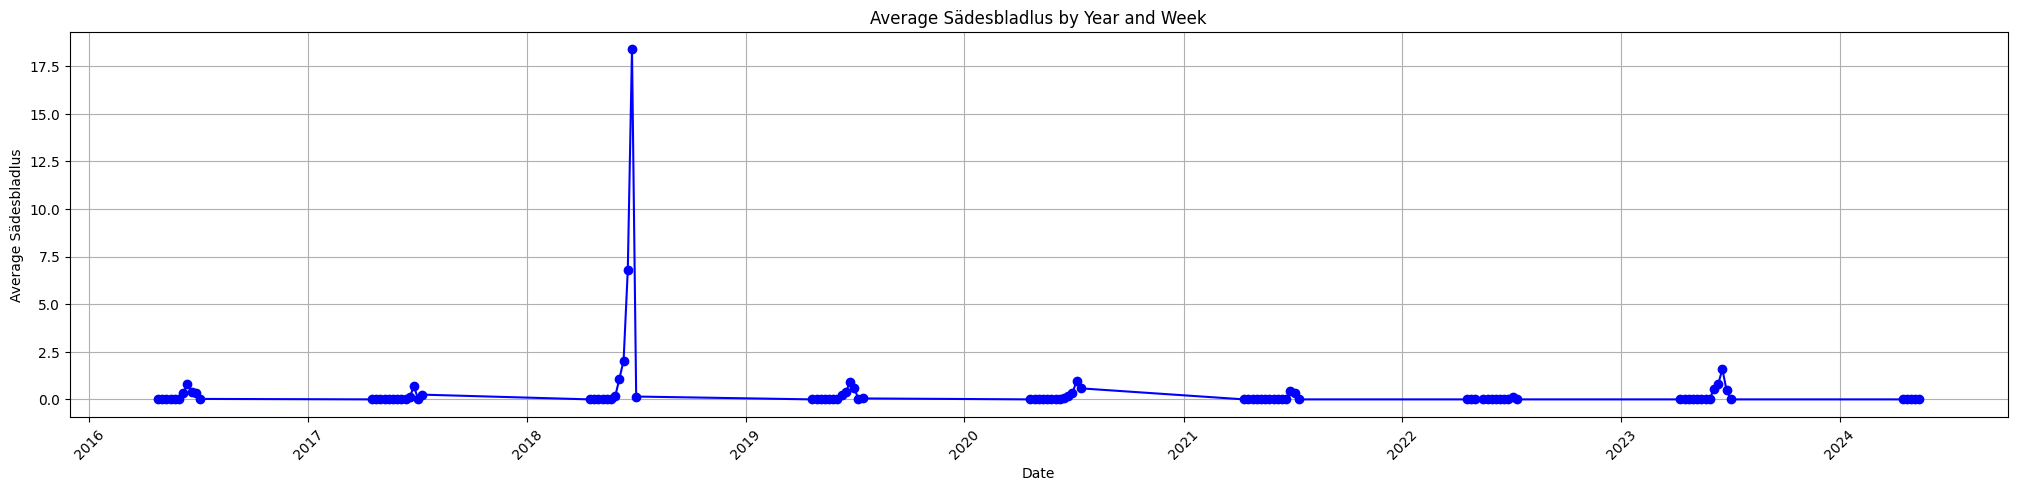

In [30]:
# Line Plot - Average by Year & Week:

group_by_year_week = df.groupby(['g_year', 'g_week'])['Sädesbladlus'].mean().reset_index()

# Convert year-week to a datetime format (assuming 'g_week' follows ISO week numbering)
group_by_year_week['date'] = pd.to_datetime(group_by_year_week['g_year'].astype(str) + '-' + 
                                            group_by_year_week['g_week'].astype(str) + '-1', 
                                            format='%Y-%W-%w')

# Plot time series
plt.figure(figsize=(25,5))
plt.plot(group_by_year_week['date'], group_by_year_week['Sädesbladlus'], marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Average Sädesbladlus')
plt.grid(True)
plt.title('Average Sädesbladlus by Year and Week')
plt.xticks(rotation=45)

plt.show()

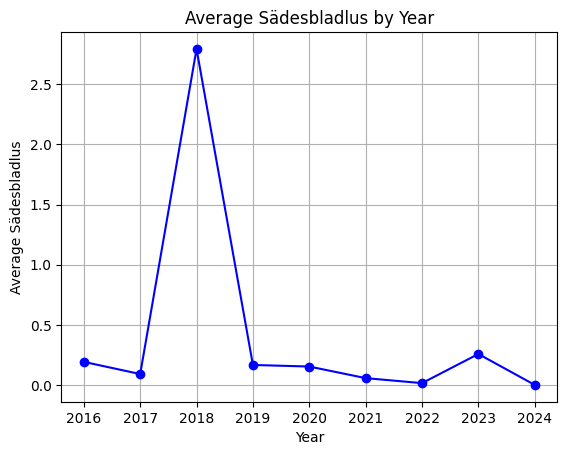

In [31]:
# Line Plot - Average by Year:

group_by_year = df.groupby(['g_year'])
average_by_year = group_by_year['Sädesbladlus'].mean()

plt.plot(average_by_year.index, average_by_year, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Sädesbladlus')
plt.xticks(average_by_year.index)  # Set x-ticks to match the years in the data
plt.grid(True)
plt.title('Average Sädesbladlus by Year')

plt.show()

Text(0.5, 1.0, 'Average Sädesbladlus by Month')

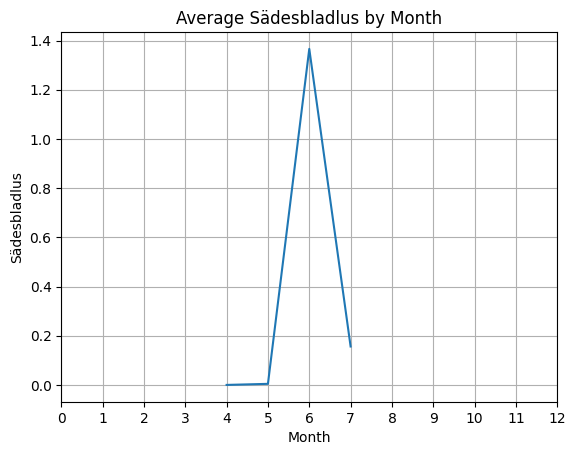

In [32]:
# Line Plot - Average by Month:

group_month = df.groupby(['g_month'])
average_by_month = group_month['Sädesbladlus'].mean()

plt.plot(average_by_month.index,average_by_month)
plt.xlabel('Month')
plt.ylabel('Sädesbladlus')
plt.xticks(np.arange(13))
plt.grid(True)
plt.title('Average Sädesbladlus by Month')

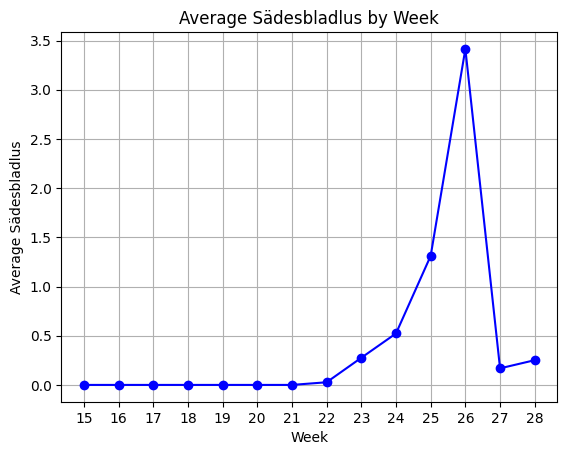

In [33]:
# Line Plot - Average by Week:

group_by_week = df.groupby(['g_week'])
average_by_week = group_by_week['Sädesbladlus'].mean()

plt.plot(average_by_week.index, average_by_week, marker='o', color='b')
plt.xlabel('Week')
plt.ylabel('Average Sädesbladlus')
plt.xticks(average_by_week.index)  # Set x-ticks to match the weeks in the data
plt.grid(True)
plt.title('Average Sädesbladlus by Week')

plt.show()

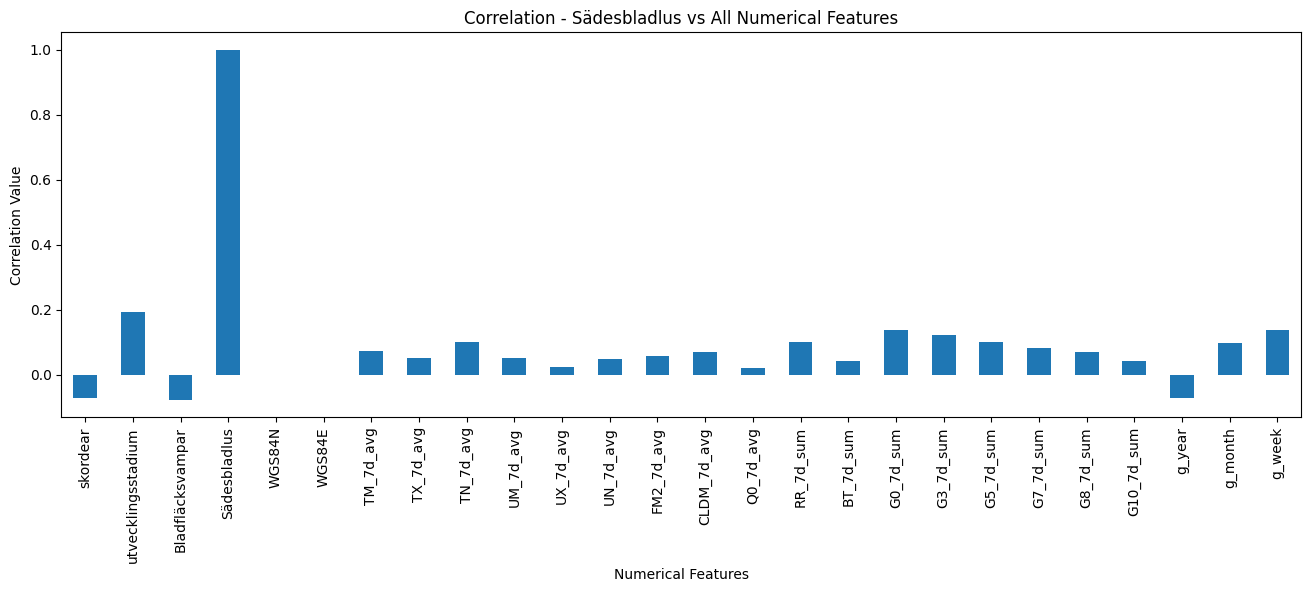

In [34]:
# Correlation Plot - Target vs Numerical Features:

plt.figure(figsize=(16,5))
corr_matrix['Sädesbladlus'].plot(kind='bar')
plt.title("Correlation - Sädesbladlus vs All Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel("Correlation Value")
plt.show()

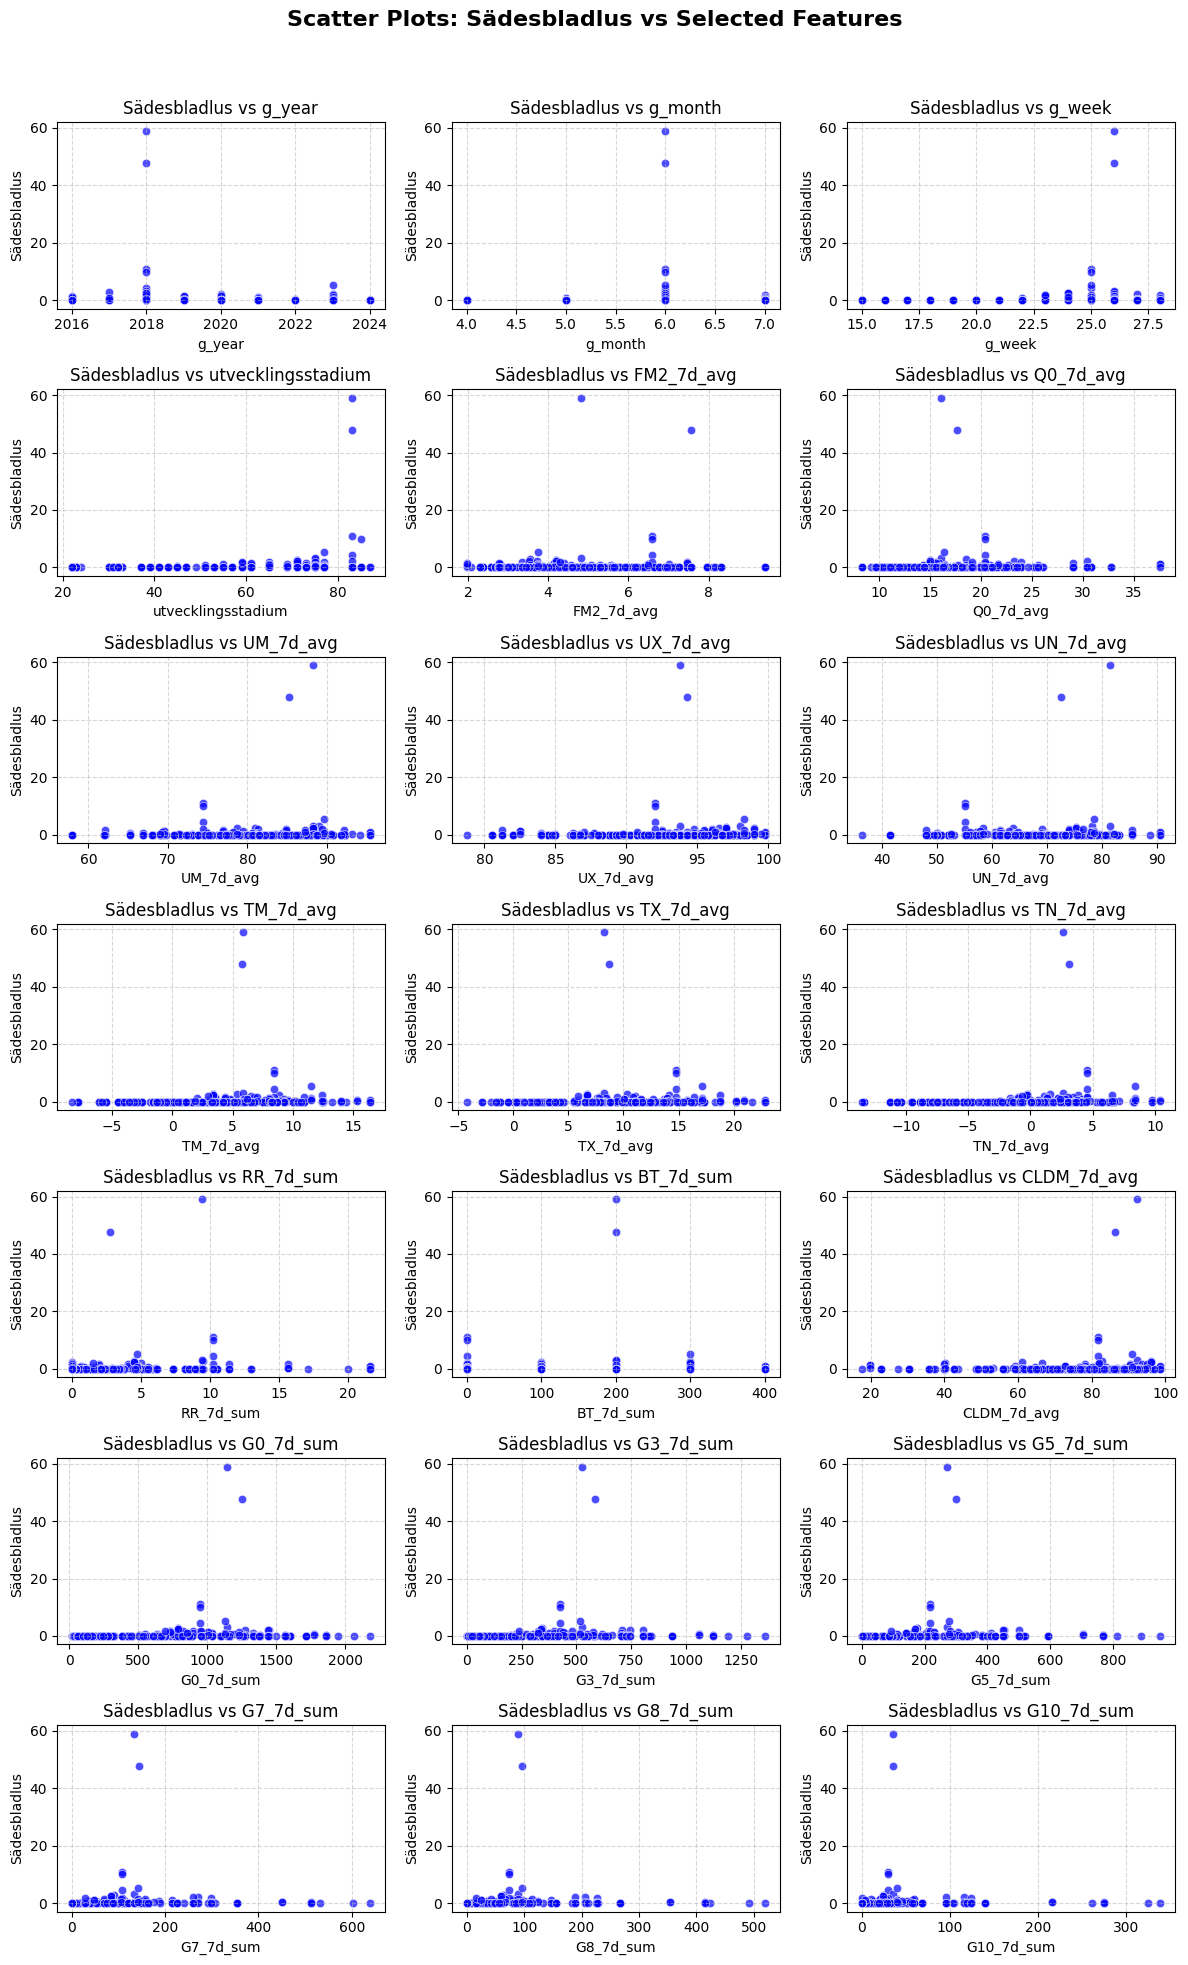

In [35]:
# Scatter Plot - Target vs Selected Features

# Define the target column and the selected columns for comparison
target_col = 'Sädesbladlus'
comparison_cols = ['g_year', 'g_month', 'g_week', 
                   'utvecklingsstadium', 'FM2_7d_avg', 'Q0_7d_avg', 
                   'UM_7d_avg', 'UX_7d_avg', 'UN_7d_avg', 
                   'TM_7d_avg', 'TX_7d_avg', 'TN_7d_avg', 
                   'RR_7d_sum', 'BT_7d_sum', 'CLDM_7d_avg', 
                   'G0_7d_sum', 'G3_7d_sum', 'G5_7d_sum',
                   'G7_7d_sum', 'G8_7d_sum', 'G10_7d_sum']

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(7, 3, figsize=(12, 20))  # Adjust layout for better visibility
fig.suptitle(f"Scatter Plots: {target_col} vs Selected Features", fontsize=16, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through selected columns and create scatter plots
for i, col in enumerate(comparison_cols):
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i], color="blue", alpha=0.7)
    axes[i].set_title(f"{target_col} vs {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 519
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   delomrade           518 non-null    object        
 1   lan                 518 non-null    object        
 2   latitud             518 non-null    object        
 3   longitud            518 non-null    object        
 4   groda               518 non-null    object        
 5   sort                518 non-null    object        
 6   jordart             518 non-null    object        
 7   skordear            518 non-null    int64         
 8   graderingsdatum     518 non-null    datetime64[ns]
 9   graderingstyp       518 non-null    object        
 10  utvecklingsstadium  518 non-null    int64         
 11  Bladfläcksvampar    518 non-null    float64       
 12  Sädesbladlus        420 non-null    float64       
 13  WGS84N              518 non-null    float64       
 14 

In [37]:
df.shape

(518, 35)

In [38]:
# pickle - pandas dataframe
df.to_pickle(df_4_eda_pkl)

# Save DataFrame to a CSV file with UTF-8 encoding
df.to_csv(df_4_eda_csv, index=False, encoding='utf-8-sig')  # Ensure proper encoding for special characters

print(f"Data pickled to {df_4_eda_pkl} and saved to {df_4_eda_csv}")

Data pickled to df_4_eda_t1.pkl and saved to df_4_eda_t1.csv
